In [51]:
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [52]:
housing_df = pd.read_csv('Housing_Price_Data.csv')

In [53]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [54]:
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [55]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


<Axes: title={'center': 'Average Housing Price by Area'}, xlabel='Area', ylabel='Average Housing Price'>

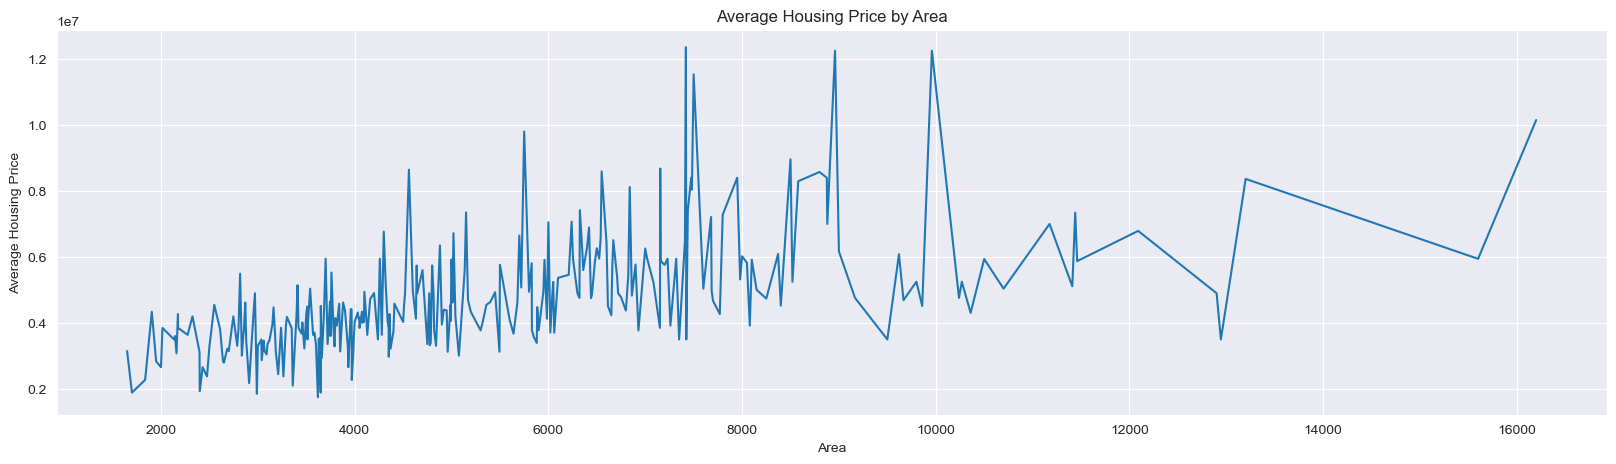

In [56]:
avg_housing_price_by_area = housing_df.groupby('area')['price'].mean()
avg_housing_price_by_area
avg_housing_price_by_area.plot(kind='line', title='Average Housing Price by Area', ylabel='Average Housing Price', xlabel='Area')

In [58]:
independent_variables_df = sm.add_constant(independent_variables_df)
regression_model = sm.OLS(dependent_variable_df, independent_variables_df).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     138.1
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           4.37e-94
Time:                        06:33:01   Log-Likelihood:                -8418.8
No. Observations:                 545   AIC:                         1.685e+04
Df Residuals:                     539   BIC:                         1.688e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.457e+05   2.47e+05     -0.591      0.5

In [57]:
independent_variable_list = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dependent_variable_list = ['price']
independent_variables_df = housing_df[independent_variable_list]
dependent_variable_df = housing_df[dependent_variable_list]

In [59]:
yn_housing_param_list=['mainroad','guestroom', 'basement','hotwaterheating', 'prefarea', 'furnishingstatus', 'airconditioning']
yn_housing_df = housing_df[yn_housing_param_list]
dist_of_yn_housing_df= yn_housing_df.groupby(['mainroad','guestroom', 'basement','hotwaterheating', 'prefarea','airconditioning']).count()
dist_of_yn_housing_df

furnishingstatus
mainroad guestroom basement hotwaterheating prefarea airconditioning                  
no       no        no       no              no       no                             42
                                                     yes                             7
                                            yes      yes                             1
                            yes             no       no                              2
                   yes      no              no       no                             10
                                                     yes                             5
                                            yes      no                              1
                            yes             no       no                              2
         yes       no       no              no       no                              2
                   yes      no              no       no                              3
                                                     yes                             2
yes      no        no       no              no       no                            151
                                                     yes                            62
                                            yes      no                             32
                                                     yes                            18
                            yes             no       no                             10
                                            yes      no                              2
                                                     yes                             1
                   yes      no              no       no                             43
                                                     yes                            19
                                            yes      no                             21
                                                     yes                            15
                            yes             no       no                              4
         yes       no       no              no       no                              5
                                                     yes                            14
                                            yes      no                              1
                                                     yes                             3
                            yes             no       no                              1
                   yes      no              no       no                             20
                                                     yes                            10
                                            yes      no                             18
                                                     yes                            15
                            yes             no       no                              3

In [60]:
mry = housing_df['mainroad'] == 'yes'
mrn = housing_df['mainroad'] == 'no'
gry = housing_df['guestroom'] == 'yes'
grn = housing_df['guestroom'] == 'no'
by = housing_df['basement'] == 'yes'
bn = housing_df['basement'] == 'no'
hwhy = housing_df['hotwaterheating'] == 'yes'
hwhn = housing_df['hotwaterheating'] == 'no'
pay = housing_df['prefarea'] == 'yes'
pan = housing_df['prefarea'] == 'no'
acy = housing_df['airconditioning'] == 'yes'
acn = housing_df['airconditioning'] == 'no'


In [61]:
housing_df_nnnnnn = housing_df[mrn & grn & bn & hwhn & pan & acn]

housing_df_nnnnny = housing_df[mrn & grn & bn & hwhn & pan & acy]

housing_df_nnnnyy = housing_df[mrn & grn & bn & hwhn & pay & acy]

housing_df_nnnynn = housing_df[mrn & grn & bn & hwhy & pan & acn]

housing_df_nnynnn = housing_df[mrn & grn & by & hwhn & pan & acn]

housing_df_nnynny = housing_df[mrn & grn & by & hwhn & pan & acy]

housing_df_nnynyn = housing_df[mrn & grn & by & hwhn & pay & acn]

housing_df_nnyynn = housing_df[mrn & grn & by & hwhy & pan & acn]

housing_df_nynnnn = housing_df[mrn & gry & bn & hwhn & pan & acn]

housing_df_nyynnn = housing_df[mrn & gry & by & hwhn & pan & acn]

housing_df_nyynny = housing_df[mrn & gry & by & hwhn & pan & acy]

housing_df_ynnnnn = housing_df[mry & grn & bn & hwhn & pan & acn]

housing_df_ynnnny = housing_df[mry & grn & bn & hwhn & pan & acy]

housing_df_ynnnyn = housing_df[mry & grn & bn & hwhn & pay & acn]

housing_df_ynnnyy = housing_df[mry & grn & bn & hwhn & pay & acy]

housing_df_ynnynn = housing_df[mry & grn & bn & hwhy & pan & acn]

housing_df_ynnyyn = housing_df[mry & grn & bn & hwhy & pay & acn]

housing_df_ynnyyy = housing_df[mry & grn & bn & hwhy & pay & acy]

housing_df_ynynnn = housing_df[mry & grn & by & hwhn & pan & acn]

housing_df_ynynny = housing_df[mry & grn & by & hwhn & pan & acy]

housing_df_ynynyn = housing_df[mry & grn & by & hwhn & pay & acn]

housing_df_ynynyy = housing_df[mry & grn & by & hwhn & pay & acy]

housing_df_ynyynn = housing_df[mry & grn & by & hwhy & pan & acn]

housing_df_yynnnn = housing_df[mry & gry & bn & hwhn & pan & acn]

housing_df_yynnny = housing_df[mry & gry & bn & hwhn & pan & acy]

housing_df_yynnyn = housing_df[mry & gry & bn & hwhn & pay & acn]

housing_df_yynnyy = housing_df[mry & gry & bn & hwhn & pay & acy]

housing_df_yynynn = housing_df[mry & gry & bn & hwhy & pan & acn]

housing_df_yyynnn = housing_df[mry & gry & by & hwhn & pan & acn]

housing_df_yyynny = housing_df[mry & gry & by & hwhn & pan & acy]

housing_df_yyynyn = housing_df[mry & gry & by & hwhn & pay & acn]

housing_df_yyynyy = housing_df[mry & gry & by & hwhn & pay & acy]

housing_df_yyyynn = housing_df[mry & gry & by & hwhy & pan & acn]

In [253]:
#print(#housing_df_nnnnnn.shape,

#housing_df_nnnnny.shape

#housing_df_nnnnyy.shape,

#housing_df_nnnynn.shape,

#housing_df_nnynnn.shape,

#housing_df_nnynny.shape,

#housing_df_nnynyn.shape,

#housing_df_nnyynn.shape,

#housing_df_nynnnn.shape,

#housing_df_nyynnn.shape,

#housing_df_nyynny.shape,

#housing_df_ynnnnn.shape,

#housing_df_ynnnny.shape,

#housing_df_ynnnyn.shape,

#housing_df_ynnnyy.shape,

#housing_df_ynnynn.shape,

#housing_df_ynnyyn.shape,

#housing_df_ynnyyy.shape,

#housing_df_ynynnn.shape,

#housing_df_ynynny.shape,

#housing_df_ynynyn.shape,

#housing_df_ynynyy.shape,

#housing_df_ynyynn.shape,

#housing_df_yynnnn.shape,

#housing_df_yynnny.shape,

#housing_df_yynnyn.shape,

#housing_df_yynnyy.shape,

#housing_df_yynynn.shape,

#housing_df_yyynnn.shape,

#housing_df_yyynny.shape,

#housing_df_yyynyn.shape,

#housing_df_yyynyy.shape
x=2
#condition1= housing_df.loc[262][0] == housing_df_nnnnnn.loc[265][0]
housing_df_nnnnnn.shape

(42, 13)

In [272]:
pd.options.mode.copy_on_write = True

for x in range(len(housing_df.index)): 
        if housing_df.index.isin(housing_df_nnnnnn.index)[x] == True:
            housing_df['proportion'].loc[x]= (housing_df_nnnnnn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_nnnnny.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_nnnnny.shape[0])/545
            
        elif housing_df.index.isin(housing_df_nnnnyy.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_nnnnyy.shape[0])/545
            
        elif housing_df.index.isin(housing_df_nnnynn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_nnnynn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_nnynnn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_nnynnn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_nnynny.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_nnynny.shape[0])/545
            
        elif housing_df.index.isin(housing_df_nnynyn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_nnynyn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_nnyynn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_nnyynn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_nynnnn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_nynnnn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_nyynnn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_nyynnn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_nyynny.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_nyynny.shape[0])/545
            
        elif housing_df.index.isin(housing_df_ynnnnn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_ynnnnn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_ynnnny.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_ynnnny.shape[0])/545
            
        elif housing_df.index.isin(housing_df_ynnnyn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_ynnnyn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_ynnnyy.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_ynnnyy.shape[0])/545
            
        elif housing_df.index.isin(housing_df_ynnynn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_ynnynn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_ynnyyn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_ynnyyn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_ynnyyy.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_ynnyyy.shape[0])/545
            
        elif housing_df.index.isin(housing_df_ynynnn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_ynynnn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_ynynny.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_ynynny.shape[0])/545
            
        elif housing_df.index.isin(housing_df_ynynyn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_ynynyn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_ynynyy.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_ynynyy.shape[0])/545
            
        elif housing_df.index.isin(housing_df_ynyynn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_ynyynn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_yynnnn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_yynnnn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_yynnny.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_yynnny.shape[0])/545
            
        elif housing_df.index.isin(housing_df_yynnyn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_yynnyn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_yynnyy.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_yynnyy.shape[0])/545
            
        elif housing_df.index.isin(housing_df_yynynn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_yynynn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_yyynnn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_yyynnn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_yyynny.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_yyynny.shape[0])/545
            
        elif housing_df.index.isin(housing_df_yyynyn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_yyynyn.shape[0])/545
            
        elif housing_df.index.isin(housing_df_yyynyy.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_yyynyy.shape[0])/545
            
        elif housing_df.index.isin(housing_df_yyyynn.index)[x] == True:
            housing_df['proportion'].loc[x] = (housing_df_yyyynn.shape[0])/545
        else:  
            housing_df['proportion'].loc[x] = 0
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,proportion
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0.033028
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0.113761
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0.038532
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0.027523
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0.018349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0.078899
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0.077064
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0.277064
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0.077064


In [273]:
independent_variable_list2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'proportion']
dependent_variable_list = ['price']
independent_variables_df2 = housing_df[independent_variable_list2]
dependent_variable_df = housing_df[dependent_variable_list]

In [275]:
independent_variables_df2 = sm.add_constant(independent_variables_df2)
regression_model2 = sm.OLS(dependent_variable_df, independent_variables_df2).fit()
print(regression_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     135.5
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          3.60e-104
Time:                        09:57:41   Log-Likelihood:                -8392.6
No. Observations:                 545   AIC:                         1.680e+04
Df Residuals:                     538   BIC:                         1.683e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.819e+05   2.55e+05      2.281      0.0

In [277]:
housing_df.groupby('furnishingstatus')['furnishingstatus'].count()

furnishingstatus
furnished         140
semi-furnished    227
unfurnished       178
Name: furnishingstatus, dtype: int64

In [293]:
fsf = housing_df['furnishingstatus'] == 'furnished'
fss = housing_df['furnishingstatus'] == 'semi-furnished'
fsu = housing_df['furnishingstatus'] == 'unfurnished'

housing_df_fsf = housing_df[fsf]
housing_df_fss = housing_df[fss]
housing_df_fsu = housing_df[fsu]

pd.options.mode.copy_on_write = True


for x in range(len(housing_df.index)): 
        if housing_df.index.isin(housing_df_fsf.index)[x] == True:
            housing_df['proportion2'].loc[x]= (housing_df_fsf.shape[0])/545
            
        elif housing_df.index.isin(housing_df_fss.index)[x] == True:
            housing_df['proportion2'].loc[x] = (housing_df_fss.shape[0])/545
            
        elif housing_df.index.isin(housing_df_fsu.index)[x] == True:
            housing_df['proportion2'].loc[x] = (housing_df_fsu.shape[0])/545
        else:  
            housing_df['proportion2'].loc[x] = 0
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,proportion,proportion2
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0.033028,0.256881
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0.113761,0.256881
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0.038532,0.416514
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0.027523,0.256881
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0.018349,0.256881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0.078899,0.326606
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0.077064,0.416514
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0.277064,0.326606
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0.077064,0.256881


In [301]:
independent_variable_list3 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'proportion', 'proportion2']
dependent_variable_list = ['price']
independent_variables_df3 = housing_df[independent_variable_list3]
dependent_variable_df = housing_df[dependent_variable_list]

In [303]:
independent_variables_df3 = sm.add_constant(independent_variables_df3)
regression_model3 = sm.OLS(dependent_variable_df, independent_variables_df3).fit()
print(regression_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     116.0
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          3.98e-103
Time:                        10:17:01   Log-Likelihood:                -8392.5
No. Observations:                 545   AIC:                         1.680e+04
Df Residuals:                     537   BIC:                         1.684e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.035e+05   3.78e+05      1.860      

In [328]:

pd.options.mode.copy_on_write = True


for x in range(len(housing_df.index)): 
        if housing_df['mainroad'].loc[x] == 'yes':
            housing_df['proportion3'].loc[x]= 468/545
        else:  
            housing_df['proportion3'].loc[x] = 77/545
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,proportion,proportion2,proportion3,proportion4
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0.033028,0.256881,0.858716,0.858716
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0.113761,0.256881,0.858716,0.858716
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0.038532,0.416514,0.858716,0.858716
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0.027523,0.256881,0.858716,0.858716
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0.018349,0.256881,0.858716,0.177982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0.078899,0.326606,0.858716,0.858716
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0.077064,0.416514,0.141284,0.141284
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0.277064,0.326606,0.858716,0.858716
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0.077064,0.256881,0.141284,0.141284


In [304]:
housing_df.groupby('mainroad').count()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,proportion,proportion2
mainroad,,,,,,,,,,,,,,
no,77,77,77,77,77,77,77,77,77,77,77,77,77,77
yes,468,468,468,468,468,468,468,468,468,468,468,468,468,468


In [324]:
housing_df.groupby('guestroom').count()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,proportion,proportion2,proportion3
guestroom,,,,,,,,,,,,,,,
no,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448
yes,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97


In [332]:
pd.options.mode.copy_on_write = True

#housing_df['proportion4']=housing_df['proportion3']
for x in range(len(housing_df.index)): 
        if housing_df['guestroom'].loc[x] == 'yes':
            housing_df['proportion4'].loc[x]= 97/545
        else:  
            housing_df['proportion4'].loc[x] = 448/545
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,proportion,proportion2,proportion3,proportion4
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0.033028,0.256881,0.858716,0.822018
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0.113761,0.256881,0.858716,0.822018
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0.038532,0.416514,0.858716,0.822018
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0.027523,0.256881,0.858716,0.822018
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0.018349,0.256881,0.858716,0.177982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0.078899,0.326606,0.858716,0.822018
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0.077064,0.416514,0.141284,0.822018
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0.277064,0.326606,0.858716,0.822018
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0.077064,0.256881,0.141284,0.822018


In [334]:
housing_df.groupby('basement').count()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,proportion,proportion2,proportion3,proportion4
basement,,,,,,,,,,,,,,,,
no,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354
yes,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191


In [338]:
pd.options.mode.copy_on_write = True

#housing_df['proportion5']=housing_df['proportion3']
for x in range(len(housing_df.index)): 
        if housing_df['basement'].loc[x] == 'yes':
            housing_df['proportion5'].loc[x]= 191/545
        else:  
            housing_df['proportion5'].loc[x] = 354/545
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,proportion,proportion2,proportion3,proportion4,proportion5
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0.033028,0.256881,0.858716,0.822018,0.649541
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0.113761,0.256881,0.858716,0.822018,0.649541
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0.038532,0.416514,0.858716,0.822018,0.350459
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0.027523,0.256881,0.858716,0.822018,0.350459
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0.018349,0.256881,0.858716,0.177982,0.350459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0.078899,0.326606,0.858716,0.822018,0.350459
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0.077064,0.416514,0.141284,0.822018,0.649541
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0.277064,0.326606,0.858716,0.822018,0.649541
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0.077064,0.256881,0.141284,0.822018,0.649541


In [339]:
housing_df.groupby('hotwaterheating').count()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus,proportion,proportion2,proportion3,proportion4,proportion5
hotwaterheating,,,,,,,,,,,,,,,,,
no,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
yes,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25


In [343]:
pd.options.mode.copy_on_write = True

#housing_df['proportion6']=housing_df['proportion3']
for x in range(len(housing_df.index)): 
        if housing_df['hotwaterheating'].loc[x] == 'yes':
            housing_df['proportion6'].loc[x]= 25/545
        else:  
            housing_df['proportion6'].loc[x] = 520/545
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,proportion,proportion2,proportion3,proportion4,proportion5,proportion6
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0.033028,0.256881,0.858716,0.822018,0.649541,0.954128
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0.113761,0.256881,0.858716,0.822018,0.649541,0.954128
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0.038532,0.416514,0.858716,0.822018,0.350459,0.954128
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0.027523,0.256881,0.858716,0.822018,0.350459,0.954128
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0.018349,0.256881,0.858716,0.177982,0.350459,0.954128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0.078899,0.326606,0.858716,0.822018,0.350459,0.954128
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0.077064,0.416514,0.141284,0.822018,0.649541,0.954128
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0.277064,0.326606,0.858716,0.822018,0.649541,0.954128
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0.077064,0.256881,0.141284,0.822018,0.649541,0.954128


In [345]:
housing_df.groupby('airconditioning').count()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,parking,prefarea,furnishingstatus,proportion,proportion2,proportion3,proportion4,proportion5,proportion6
airconditioning,,,,,,,,,,,,,,,,,,
no,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373
yes,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172


In [348]:
pd.options.mode.copy_on_write = True

#housing_df['proportion7']=housing_df['proportion3']
for x in range(len(housing_df.index)): 
        if housing_df['airconditioning'].loc[x] == 'yes':
            housing_df['proportion7'].loc[x]= 172/545
        else:  
            housing_df['proportion7'].loc[x] = 373/545
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,proportion,proportion2,proportion3,proportion4,proportion5,proportion6,proportion7
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0.033028,0.256881,0.858716,0.822018,0.649541,0.954128,0.315596
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0.113761,0.256881,0.858716,0.822018,0.649541,0.954128,0.315596
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0.038532,0.416514,0.858716,0.822018,0.350459,0.954128,0.684404
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0.027523,0.256881,0.858716,0.822018,0.350459,0.954128,0.315596
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0.018349,0.256881,0.858716,0.177982,0.350459,0.954128,0.315596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0.078899,0.326606,0.858716,0.822018,0.350459,0.954128,0.684404
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0.077064,0.416514,0.141284,0.822018,0.649541,0.954128,0.684404
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0.277064,0.326606,0.858716,0.822018,0.649541,0.954128,0.684404
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0.077064,0.256881,0.141284,0.822018,0.649541,0.954128,0.684404


In [349]:
housing_df.groupby('prefarea').count()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,proportion,proportion2,proportion3,proportion4,proportion5,proportion6,proportion7
prefarea,,,,,,,,,,,,,,,,,,,
no,417,417,417,417,417,417,417,417,417,417,417,417,417,417,417,417,417,417,417
yes,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128


In [352]:
pd.options.mode.copy_on_write = True

#housing_df['proportion8']=housing_df['proportion3']
for x in range(len(housing_df.index)): 
        if housing_df['prefarea'].loc[x] == 'yes':
            housing_df['proportion8'].loc[x]= 128/545
        else:  
            housing_df['proportion8'].loc[x] = 417/545
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,prefarea,furnishingstatus,proportion,proportion2,proportion3,proportion4,proportion5,proportion6,proportion7,proportion8
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,yes,furnished,0.033028,0.256881,0.858716,0.822018,0.649541,0.954128,0.315596,0.234862
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,no,furnished,0.113761,0.256881,0.858716,0.822018,0.649541,0.954128,0.315596,0.765138
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,yes,semi-furnished,0.038532,0.416514,0.858716,0.822018,0.350459,0.954128,0.684404,0.234862
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,yes,furnished,0.027523,0.256881,0.858716,0.822018,0.350459,0.954128,0.315596,0.234862
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,no,furnished,0.018349,0.256881,0.858716,0.177982,0.350459,0.954128,0.315596,0.765138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,...,no,unfurnished,0.078899,0.326606,0.858716,0.822018,0.350459,0.954128,0.684404,0.765138
541,1767150,2400,3,1,1,no,no,no,no,no,...,no,semi-furnished,0.077064,0.416514,0.141284,0.822018,0.649541,0.954128,0.684404,0.765138
542,1750000,3620,2,1,1,yes,no,no,no,no,...,no,unfurnished,0.277064,0.326606,0.858716,0.822018,0.649541,0.954128,0.684404,0.765138
543,1750000,2910,3,1,1,no,no,no,no,no,...,no,furnished,0.077064,0.256881,0.141284,0.822018,0.649541,0.954128,0.684404,0.765138


In [353]:
independent_variable_list4 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'proportion', 'proportion2', 'proportion3','proportion4','proportion5','proportion6','proportion7','proportion8']
dependent_variable_list = ['price']
independent_variables_df4 = housing_df[independent_variable_list4]
dependent_variable_df = housing_df[dependent_variable_list]

In [354]:
independent_variables_df4 = sm.add_constant(independent_variables_df4)
regression_model4 = sm.OLS(dependent_variable_df, independent_variables_df4).fit()
print(regression_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     84.21
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          8.74e-120
Time:                        10:59:19   Log-Likelihood:                -8338.6
No. Observations:                 545   AIC:                         1.671e+04
Df Residuals:                     531   BIC:                         1.677e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.381e+06   7.66e+05      5.722      

In [357]:
housing_df.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking,proportion,proportion2,proportion3,proportion4,proportion5,proportion6,proportion7,proportion8
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,-0.335046,-0.064015,0.296898,-0.255517,-0.187057,-0.093073,-0.452954,-0.329777
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,-0.078720,-0.064053,0.288874,-0.140297,-0.047417,0.009229,-0.222393,-0.234779
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.141942,-0.002926,-0.012033,-0.080549,-0.097312,-0.046049,-0.160603,-0.079023
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,-0.192637,-0.030306,0.042398,-0.126469,-0.102106,-0.067159,-0.186915,-0.063472
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,-0.106455,-0.046108,0.121706,-0.043538,0.172394,-0.018847,-0.293602,-0.044425
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,-0.079319,-0.033290,0.204433,-0.037466,-0.051497,-0.067864,-0.159173,-0.091627
proportion,-0.335046,-0.078720,-0.141942,-0.192637,-0.106455,-0.079319,1.000000,0.011831,0.265978,0.403611,0.534452,0.220682,0.377661,0.415511
proportion2,-0.064015,-0.064053,-0.002926,-0.030306,-0.046108,-0.033290,0.011831,1.000000,-0.053049,0.042722,-0.001549,-0.047437,0.111597,0.054791
proportion3,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,0.265978,-0.053049,1.000000,-0.092337,-0.044002,0.011781,-0.105423,-0.199876
proportion4,-0.255517,-0.140297,-0.080549,-0.126469,-0.043538,-0.037466,0.403611,0.042722,-0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897
